In [ ]:
# Mounting your google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Spatial Analysis in Python

For this case, we will be covering some introductory spatial analysis concepts and visualizations. This will introduce you to the basics and hopefully reveal some of the things that you can do in Python. Towards the end, there will be an example of a more complex analysis as well as additional resources to explore on your own. For highly advanced spatial analysis techniques, you may need to write your own programs, utilize specialized packages, or use alternative software like ESRI's ArcGIS. 

Some commonly used packages include: 
  - pandas / geopandas
  - folium
  - shapely
  - pysal
  - pyproj
  - osmnx / pyrosm
  - matplotlib (visualization)
  - networkx

These are open source packages that are independent from any specific software. These tend to be the core libraries for spatial data science applications and are used in a number of commercial settings. 

## Choropleth Maps

To begin, let's take a look at choropleth maps. **Choropleth maps** are used to identify trends across regions. In this sense, they work well when you need to **compare data across categories**, whether that be continents, countries, states, etc. To introduce the idea of chlorpleth maps, we will use an example employing **Folium**. Folium is a really popular open source package that aids in the plotting of data associated with geospatial information. The maps produced with **folium** have a lot of options for design and use as well as native interactive features.  

In [ ]:
# Importing libraries. 
import pandas as pd
import folium

In [ ]:
# Getting US State Data
url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data"
)
state_geo = f"{url}/us-states.json"
state_unemployment = f"{url}/US_Unemployment_Oct2012.csv"
state_data = pd.read_csv(state_unemployment)

# Creating initial US map.
m = folium.Map(location=[48, -102], zoom_start=3)

# Plotting US Unemployment Choropleth
folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=state_data,
    columns=["State", "Unemployment"],
    key_on="feature.id",
    fill_color="BuPu",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Unemployment Rate (%)",
).add_to(m)

folium.LayerControl().add_to(m)

m

## Heatmaps

**Heatmaps** are similar to choropleth maps in that they use color to help communicate trends, but heatmaps work less with categorical data and more with data across less defined regions (most often using latitude and longitude). Here we will look at an applied example utilizing AirBnb data for NYC (https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data). 

In [ ]:
from folium.plugins import HeatMap

In [ ]:
nyc_data=pd.read_csv('/content/drive/MyDrive/2021-2022 CADS/Workshops Events/11 03 Spatial Analysis/AB_NYC_2019.csv', delimiter=',')

nyc_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
# Setting focus coordinates
nyc_coords = [40.738, -73.98] # Latitude and longitude

# Initializing the map, with a little bit of style. 
nyc_folium_map = folium.Map(location=nyc_coords, zoom_start=12, tiles='CartoDB dark_matter')
nyc_folium_map

In [ ]:
# Selecting Data for our Heatmap
nyc_zip = zip(nyc_data['latitude'], nyc_data['longitude'], nyc_data['price'])
working_df = list(nyc_zip)

In [ ]:
# Creating the Heatmap Layer
hm_layer = HeatMap(working_df,
                   min_opacity=0.2,
                   radius=8,
                   blur=6, 
                 )

In [ ]:
# Adding the layer to the initial map
nyc_folium_map.add_child(hm_layer)
nyc_folium_map

## Geospatial Data

**Geopandas** is a key Python package as it facillitates the use of geospatial data in a relatively easy way. Geopandas works to combine the functionality of pandas with other packages that help manage spatial data. The two key data structures are GeoSeries and GeoDataframes. A GeoDataframe should contain a column with information on geometries (points, lines, polygons, multipolygons, etc.), often named 'geometry'. This column of geometries is a Geoseries. 

The following sections are based on the guidance provided here: https://sustainability-gis.readthedocs.io/en/latest/lessons/L1/intro-to-python-geostack.html

In [ ]:
!pip install geopandas

In [ ]:
import geopandas as gpd

## Working With Files

GeoSpatial data can come in a number of formats and can be accessed in a number of ways. Sometimes you will download shapefiles or other geospatial files, and other times you may access it directly through Open Street Map or hosted data repositories. 

To begin, it is helpful to just work with a file. In this respect, you knoe that you have the data and do not need to rely on outside connections to import the data correctly. To do this, we will look at a GeoJSON file containing building data for Helsinki. 


In [ ]:
# Filepath
fp = "/content/drive/MyDrive/2021-2022 CADS/Workshops Events/11 03 Spatial Analysis/buildings.geojson"

# Read the file
buildings = gpd.read_file(fp)

# How does it look?
buildings.head()

,addr:city,addr:country,addr:housenumber,addr:housename,addr:postcode,addr:street,email,name,opening_hours,operator,phone,ref,url,website,building,amenity,building:levels,building:material,building:min_level,height,landuse,office,shop,source,start_date,wikipedia,id,timestamp,version,tags,osm_type,internet_access,changeset,geometry
0,Helsinki,None,29,None,00170,Unioninkatu,None,None,None,None,None,None,None,None,yes,None,None,None,None,None,None,None,None,None,None,None,4253124,1542041335,4,None,way,None,NaN,"POLYGON ((24.95121 60.16999, 24.95122 60.16988..."
1,Helsinki,None,2,None,00100,Kaivokatu,ainfo@ateneum.fi,Ateneum,"Tu, Fr 10:00-18:00; We-Th 10:00-20:00; Sa-Su 1...",None,+3580294500401,None,ateneum.fi,http://www.vanhaylioppilastalo.fi/,museum,None,3.5,None,None,None,None,None,None,None,1887,fi:Ateneumin taidemuseo,8033120,1544822447,27,"{'architect': 'Theodor Höijer', 'contact:websi...",way,None,NaN,"POLYGON ((24.94477 60.16982, 24.94450 60.16981..."
2,Helsinki,FI,22-24,None,None,Mannerheimintie,None,Lasipalatsi,None,None,None,None,http://www.lasipalatsi.fi/,None,public,None,None,None,None,None,None,None,None,None,1936,fi:Lasipalatsi,8035238,1533831167,23,"{'name:fi': 'Lasipalatsi', 'name:sv': 'Glaspal...",way,None,NaN,"POLYGON ((24.93561 60.17045, 24.93555 60.17054..."
3,Helsinki,None,2,None,00100,Mannerheiminaukio,None,Kiasma,Tu 10:00-17:00; We-Fr 10:00-20:30; Sa 10:00-18...,None,+358 (0)294 500 501,None,http://www.kiasma.fi/,https://kiasma.fi/,public,None,4,None,None,None,None,None,None,None,1998,fi:Kiasma (rakennus),8042215,1553963033,30,"{'name:en': 'Museum of Modern Art Kiasma', 'na...",way,None,NaN,"POLYGON ((24.93682 60.17152, 24.93662 60.17150..."
4,None,FI,None,None,None,None,None,None,None,None,None,None,None,None,yes,None,None,None,None,None,None,None,None,None,None,None,15243643,1546289715,7,None,way,None,NaN,"POLYGON ((24.93675 60.16779, 24.93660 60.16789..."


## Basic GeoPandas Applications

**GeoPandas** shares a lot of functionality with Pandas. Therefore, it is helpful to see some of the basic applications of these base functionalities. 

In [ ]:
# Running Descriptive Stats
buildings.describe()

,id,timestamp,version,changeset
count,4.860000e+02,4.860000e+02,486.000000,66.0
mean,1.400780e+08,1.455829e+09,4.849794,0.0
std,1.633527e+08,9.247528e+07,4.561162,0.0
min,8.253000e+03,1.197929e+09,1.000000,0.0
25%,2.294267e+07,1.374229e+09,2.000000,0.0
50%,1.228699e+08,1.493288e+09,3.000000,0.0
75%,1.359805e+08,1.530222e+09,7.000000,0.0
max,1.042029e+09,1.555840e+09,31.000000,0.0


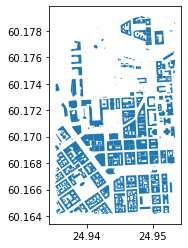

In [ ]:
# Creating a simple polygon plot
buildings.plot()

In [ ]:
# Saving an output as a shapefile. Do not need to run, but here for reference. 
outfp = "buildings_copy.shp"
buildings.to_file(outfp)

## Reprojecting Data

From the previous maps, we can see that the coordinates on the x and y axis hint that our geometries are represented in decimal degrees (WGS84). In many cases, we will want to reproject our data to another Coordinate Reference System (CRS). We can first access the CRS information of the GeoDataFrame by accessing an attribute called crs.

In [ ]:
buildings.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

We can reproject our data by using a method to_crs(). We can reproject our data into EPSG 3067, the most widely used projected coordinate reference system used in Finland, EUREF-FIN:

In [ ]:
projected = buildings.to_crs(epsg=3067)
projected.crs

<Projected CRS: EPSG:3067>
Name: ETRS89 / TM35FIN(E,N)
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Finland - onshore and offshore.
- bounds: (19.08, 58.84, 31.59, 70.09)
Coordinate Operation:
- name: TM35FIN
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

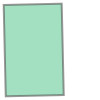

In [ ]:
# Checking Proj Geom
projected_geom = projected.loc[0, "geometry"]
projected_geom

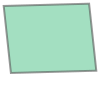

In [ ]:
# Comparing with Orig Geom - Doesn't show up, right?
orig_geom = buildings.loc[0, "geometry"]
orig_geom

## Calculating Building Area

Now that we have the reprojected data, we can work to identify the building area in the dataset. This is as easy as using base Pandas functions and the **area** GeoPandas attribute. 

In [ ]:
projected["building_area"] = projected.area
projected["building_area"].describe()

count     486.000000
mean     1072.326027
std      1165.641499
min         0.008782
25%       218.602850
50%       800.512868
75%      1428.335280
max      8244.176220
Name: building_area, dtype: float64

## Spatial Joins

A commonly needed GIS functionality, is to be able to merge information between two layers using location as the key. Hence, it is somewhat similar approach as table join but because the operation is based on geometries, it is called a spatial join. We will see how we can conduct a spatial join and merge information between two layers. 

In [ ]:
# Filepath
fp = "/content/drive/MyDrive/2021-2022 CADS/Workshops Events/11 03 Spatial Analysis/restaurants.geojson"

# Read the file
restaurants = gpd.read_file(fp)

# How does it look?
restaurants.head()

,changeset,tags,lon,id,timestamp,version,lat,addr:city,addr:country,addr:housenumber,addr:housename,addr:postcode,addr:street,email,name,opening_hours,operator,phone,url,website,amenity,internet_access,pub,source,osm_type,geometry
0,0,"{'smoking': 'outside', 'seasonal:summer': 'yes...",24.952852,56418307,1429855475,11,60.178001,Helsinki,None,3,None,00530,Hakaniemenranta,None,Ravintolalaiva M/S Maria,None,None,+358 44 945 9423,None,https://www.facebook.com/RavintolalaivaMaria,restaurant,None,None,None,node,POINT (24.95285 60.17800)
1,0,"{'diet:vegan': 'yes', 'diet:vegetarian': 'yes'...",24.944996,59622323,1553963252,10,60.172112,Helsinki,None,18,None,00100,Mikonkatu,None,Maya Bar & Grill,Mo-Th 11:00-23:00; Fr 11:00-24:00; Sa 12:00-24...,None,None,None,https://www.maya.fi/,restaurant,None,None,None,node,POINT (24.94500 60.17211)
2,0,"{'lunch': 'yes', 'smoking': 'outside'}",24.941545,59631978,1429827254,5,60.176704,Helsinki,None,5,None,00100,Kaisaniementie,None,Ravintola Kaisaniemi,None,None,+358 9 632 223,None,http://www.sinunjuhlasi.fi/ravintolat-2/ravint...,restaurant,None,None,None,node,POINT (24.94155 60.17670)
3,0,"{'created_by': 'Potlatch 0.4a', 'wheelchair': ...",24.937647,62967659,1493503123,4,60.171337,Helsinki,None,1 B,None,00100,Mannerheiminaukio,None,Ravintola Pääposti,None,None,None,None,https://fazer.fi/kahvilat-ja-leipomot/ravintol...,restaurant,None,None,None,node,POINT (24.93765 60.17134)
4,0,{'wheelchair': 'limited'},24.947668,76474077,1468481090,8,60.179020,Helsinki,FI,6,None,00530,Säästöpankinranta,None,Graniittilinna,None,None,None,None,https://www.graniittilinna.com,restaurant,None,None,None,node,POINT (24.94767 60.17902)


In [ ]:
import geopandas as gpd
# Join information from buildings to restaurants using the sjoin function in geopandas
join = gpd.sjoin(restaurants, buildings)

# Show rows
join.head()

,changeset_left,tags_left,lon,id_left,timestamp_left,version_left,lat,addr:city_left,addr:country_left,addr:housenumber_left,addr:housename_left,addr:postcode_left,addr:street_left,email_left,name_left,opening_hours_left,operator_left,phone_left,url_left,website_left,amenity_left,internet_access_left,pub,source_left,osm_type_left,geometry,index_right,addr:city_right,addr:country_right,addr:housenumber_right,addr:housename_right,addr:postcode_right,addr:street_right,email_right,name_right,opening_hours_right,operator_right,phone_right,ref,url_right,website_right,building,amenity_right,building:levels,building:material,building:min_level,height,landuse,office,shop,source_right,start_date,wikipedia,id_right,timestamp_right,version_right,tags_right,osm_type_right,internet_access_right,changeset_right
0,0,"{'smoking': 'outside', 'seasonal:summer': 'yes...",24.952852,56418307,1429855475,11,60.178001,Helsinki,None,3,None,00530,Hakaniemenranta,None,Ravintolalaiva M/S Maria,None,None,+358 44 945 9423,None,https://www.facebook.com/RavintolalaivaMaria,restaurant,None,None,None,node,POINT (24.95285 60.17800),8,None,None,None,None,None,None,None,M/S Maria,None,None,None,None,None,None,ship,None,None,None,None,None,None,None,None,None,None,None,17028575,1287484999,5,None,way,None,NaN
1,0,"{'diet:vegan': 'yes', 'diet:vegetarian': 'yes'...",24.944996,59622323,1553963252,10,60.172112,Helsinki,None,18,None,00100,Mikonkatu,None,Maya Bar & Grill,Mo-Th 11:00-23:00; Fr 11:00-24:00; Sa 12:00-24...,None,None,None,https://www.maya.fi/,restaurant,None,None,None,node,POINT (24.94500 60.17211),425,None,None,None,None,None,None,None,None,None,None,None,None,None,None,yes,None,None,None,None,None,None,None,None,None,None,None,36737,1493288031,4,{'type': 'multipolygon'},relation,None,0.0
72,0,"{'cuisine': 'nepalese', 'wheelchair': 'limited'}",24.944563,1369465630,1548278645,3,60.172104,Helsinki,None,8,None,00100,Vilhonkatu,None,Mount Everest,None,None,None,None,http://www.everestyeti.fi/,restaurant,None,None,None,node,POINT (24.94456 60.17210),425,None,None,None,None,None,None,None,None,None,None,None,None,None,None,yes,None,None,None,None,None,None,None,None,None,None,None,36737,1493288031,4,{'type': 'multipolygon'},relation,None,0.0
2,0,"{'lunch': 'yes', 'smoking': 'outside'}",24.941545,59631978,1429827254,5,60.176704,Helsinki,None,5,None,00100,Kaisaniementie,None,Ravintola Kaisaniemi,None,None,+358 9 632 223,None,http://www.sinunjuhlasi.fi/ravintolat-2/ravint...,restaurant,None,None,None,node,POINT (24.94155 60.17670),116,Helsinki,None,6,None,None,Kaisaniementie,None,None,None,None,None,None,None,None,yes,None,None,None,None,None,None,None,None,None,before 1943,None,25891166,1522084241,7,None,way,None,NaN
3,0,"{'created_by': 'Potlatch 0.4a', 'wheelchair': ...",24.937647,62967659,1493503123,4,60.171337,Helsinki,None,1 B,None,00100,Mannerheiminaukio,None,Ravintola Pääposti,None,None,None,None,https://fazer.fi/kahvilat-ja-leipomot/ravintol...,restaurant,None,None,None,node,POINT (24.93765 60.17134),195,None,None,None,None,None,None,None,Postitalo,None,None,None,None,http://www.paapostitalo.fi/,None,yes,None,1,None,None,None,None,None,None,None,1938-10,fi:Postitalo (Helsinki),122595218,1544822461,7,"{'name:sv': 'Posthuset', 'wikidata': 'Q3399855'}",way,None,NaN


In [ ]:
# If you get an error regarding rtree or pygeos, run this code and then re-run the code that delivered the error. 
!pip uninstall -q rtree
!pip uninstall -q pygeos
!pip uninstall -q geopandas
!sudo apt install -q libspatialindex-dev
!pip install -q rtree
!pip install -q pygeos
!pip install -q geopandas


Proceed (y/n)? y
Proceed (y/n)? y
Proceed (y/n)? y
Reading package lists...
Building dependency tree...
Reading state information...
libspatialindex-dev is already the newest version (1.8.5-5).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


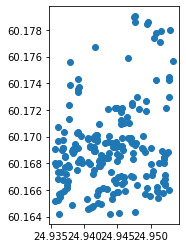

In [ ]:
# Visualize the data as well
join.plot()

### Selecting Data With Joins


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if self.run_code(code, result):


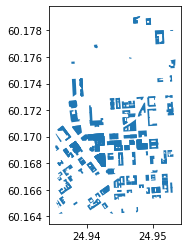

In [ ]:
# Merge information from restaurants to buildings (conducts selection at the same time)
join2 = gpd.sjoin(buildings, restaurants, how="inner", op="intersects")
join2.plot()

### Highlighting Building Types and Their Locations

In [ ]:
import matplotlib.pyplot as plt

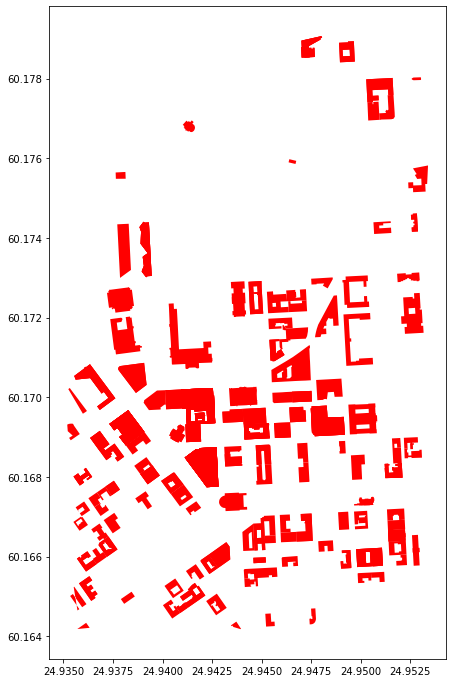

In [ ]:
# Showing joined data with a simple visualization
ax = join2.plot(facecolor="red", figsize=(12,12))

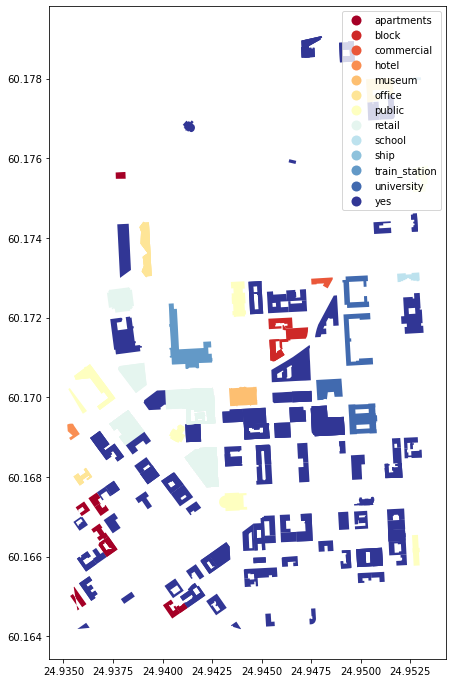

In [ ]:
# Adding in building type information

ax = join2.plot(column="building", cmap="RdYlBu", figsize=(12,12), legend=True)

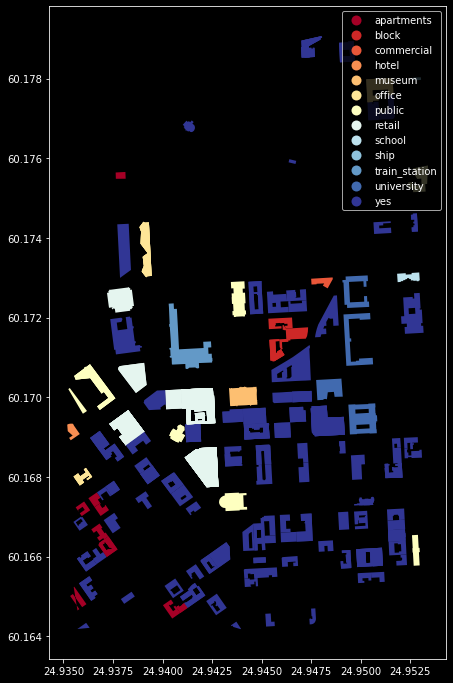

In [ ]:
# Plotting the map with a dark background to improve design
with plt.style.context('dark_background'):
  ax = join2.plot(column="building", cmap="RdYlBu", figsize=(12,12), legend=True)


# Advanced Analysis Example: Length of Travel Time Using Path Analysis

For this example, the author is considering the length of time different railway journeys take from an original address. Ultimately, we see that the farther away a railway line is from the original address, the longer the travel time. 

This example is entirely sourced from here: https://sustainability-gis.readthedocs.io/en/latest/lessons/L2/spatial_network_analysis.html 

Please check out the site for more information on this project and more associated learning resources. 

In [ ]:
!pip install -q mapclassify
!pip install -q osmnx

In [ ]:
from pyrosm import OSM, get_data
import osmnx as ox
import pandas as pd
import networkx as nx

def road_class_to_kmph(road_class):
    """
    Returns a speed limit value based on road class, 
    using typical Finnish speed limit values within urban regions.
    """
    if road_class == "motorway":
        return 100
    elif road_class == "motorway_link":
        return 80
    elif road_class in ["trunk", "trunk_link"]:
        return 60
    elif road_class == "service":
        return 30
    elif road_class == "living_street":
        return 20
    else:
        return 50
    
def assign_speed_limits(edges):
    # Separate rows with / without speed limit information 
    mask = edges["maxspeed"].isnull()
    edges_without_maxspeed = edges.loc[mask].copy()
    edges_with_maxspeed = edges.loc[~mask].copy()

    # Apply the function and update the maxspeed
    edges_without_maxspeed["maxspeed"] = edges_without_maxspeed["highway"].apply(road_class_to_kmph)
    edges = edges_with_maxspeed.append(edges_without_maxspeed)
    edges["maxspeed"] = edges["maxspeed"].astype(int)
    edges["travel_time_seconds"] = edges["length"] / (edges["maxspeed"]/3.6)
    return edges
    
# Fetch data for Helsinki
osm = OSM(get_data("helsinki"))
nodes, edges = osm.get_network(network_type="driving", nodes=True)

# Assign speed limits for missing ones based on road classs information
edges = assign_speed_limits(edges)

Downloaded Protobuf data 'Helsinki.osm.pbf' (30.62 MB) to:
'/tmp/pyrosm/Helsinki.osm.pbf'


In [ ]:
# Create a graph
G2 = osm.to_graph(nodes, edges, graph_type="networkx")

In [ ]:
# Calculate travel times from central railway station
orig_address = "Rautatientori, Helsinki"
orig_y, orig_x = ox.geocode(orig_address)  # notice the coordinate order (y, x)!
orig_node_id, dist_to_orig = ox.get_nearest_node(G2, point=(orig_y, orig_x), method='haversine', return_dist=True)
travel_times = nx.single_source_dijkstra_path_length(G2, source=orig_node_id, weight='travel_time_seconds')

# Convert to DataFrame and add column names
travel_times_df = pd.DataFrame([list(travel_times.keys()), list(travel_times.values())]).T
travel_times_df.columns = ['node_id', 'travel_time']
nodes_t = nodes.merge(travel_times_df, left_on='id', right_on='node_id')

# Convert travel time to minutes
nodes_t["travel_time"] = (nodes_t["travel_time"] / 60).round(0)

/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)


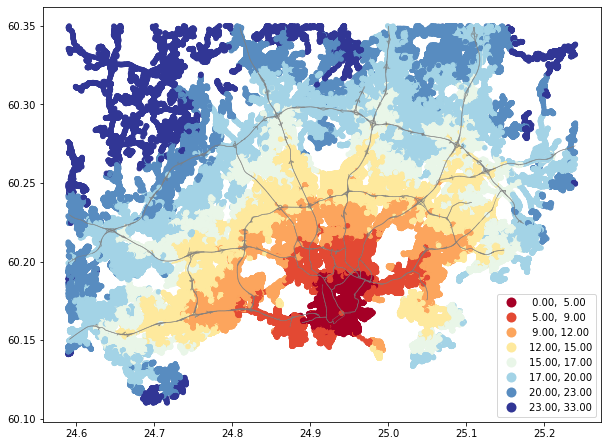

In [ ]:
# Plot the results
main_roads = edges.loc[edges["highway"].isin(["motorway", "motorway_link", "trunk", "trunk_link", "primary", "primary_link"])]
ax = main_roads.plot(lw=0.5, color='gray', zorder=3, figsize=(10,10))
ax = nodes_t.plot('travel_time', ax=ax, cmap='RdYlBu', scheme='natural_breaks', k=8, markersize=20, legend=True)

# Conclusions

In this case, we have reviewed a few different approaches to spatial analysis, focusing on some basic conecepts and ideas. Hopefully, this session has acted as a wuick primer to get you familiar with the types of things that can be done using Python. There are a number of project where spatial methods could be beneficial, but as always, the methods and approaches shouldbe conceptually aligned with the questions at hand and the data available. 

# Resources

Spatial Regression Example: https://sustainability-gis.readthedocs.io/en/latest/lessons/L4/spatial_regression.html

Pyrosm Documentation: https://pyrosm.readthedocs.io/en/latest/basics.html

Folium Documentation: https://python-visualization.github.io/folium/index.html

Geopandas Documentation: https://geopandas.org/docs/user_guide.html



